# <p style="text-align:center">  $ \text{Trabalho I}$ <br> $\text{Compiladores} $  

### Depêndencias

In [3]:
import os
import getpass

In [108]:
password = getpass.getpass()
os.system('echo %s | %s' % (password, 'sudo -S apt-get install graphviz'))
! pip install pydot pydot-ng graphviz

[sudo] password for spinosa: 

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-5).
0 upgraded, 0 newly installed, 0 to remove and 1147 not upgraded.


### Importações

In [5]:
# Q3
from utils.automata import FA
import re

### 1 -  Crie Tokens apropriados e para cada Token faça uma Expressão Regular para a Linguagem A. A Linguagem A é definida a partir da Linguagem C, as características da A são:
- #### Possui apenas os tipos de dados int e string;
- #### Não possui laços de repetição;
- #### Possui a instrução if-else, tal qual a Linguagem C;
- #### Cada função da A tem no máximo dois parâmetros;
- #### As demais características são idênticas ao C, inclusive a sintaxe;

In [ ]:
TOKENS = {
    'TYPE' : r'int|string',
    'IF': r'if',
    'ELSE': r'else',
    'FUNC': r'[a-z]+\(\s*(int|string)\s[a-z]+[0-9]*\s*(\)|,\s*(int|string)\s[a-z]+[0-9]*\))',
    'LPARENT': r'\(',
    'RPARENT': r'\)',
    'SEMICOL': r';',
    'ASSIGN': r'=',
    'ADD': r'\+',
    'DIF': r'-',
    'DIV': r'/',
    'MULT': r'*',
    'LCOL': r'\{',
    'RCOL': r'\}'
}

### 3 - Implemente um algoritmo que recebe como entrada um NFA e retorna um Autômato Finito Determinístico (DFA)

In [43]:
automato_nfa = FA(
    initial='A',
    finals='C',
    A = {'0': {'B', 'C'}, '1':'A', '': 'B'},
    B = {'1': 'B', '': 'C'},
    C = {'0':'C', '1': 'C'}
)

In [44]:
automato_nfa

A -> {'0': {'B', 'C'}, '1': {'A'}, '': {'B'}}
B -> {'1': {'B'}, '': {'C'}}
C -> {'0': {'C'}, '1': {'C'}}

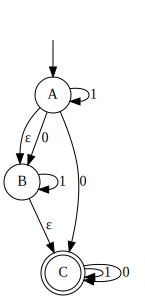

In [45]:
automato_nfa.make_automata_graph()

In [46]:
states, initial_state, final_states =  automato_nfa.nfa2dfa()

In [47]:
states

{"('B', 'C', 'A')": {'0': ('B', 'C'), '1': ('B', 'C', 'A')},
 "('C',)": {'0': ('C',), '1': ('C',)},
 "('B', 'C')": {'0': ('C',), '1': ('B', 'C')}}

In [48]:
initial_state

('B', 'C', 'A')

In [49]:
final_states

[('B', 'C', 'A'), ('C',), ('B', 'C')]

In [50]:
automato_dfa = FA(
    initial=str(initial_state),
    finals=map(str, final_states),
    **states
)

In [51]:
automato_dfa

('B', 'C', 'A') -> {'0': {('B', 'C')}, '1': {('B', 'C', 'A')}}
('C',) -> {'0': {('C',)}, '1': {('C',)}}
('B', 'C') -> {'0': {('C',)}, '1': {('B', 'C')}}

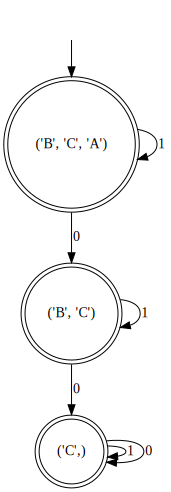

In [52]:
automato_dfa.make_automata_graph()